This notebook reads in two SLCs and plots:
1. Phase of the two raw SLCs (they look meaningless)
2. The interferogram that those SLCs produce

This notebook was organized on 9-26-22

***

Import things. Use conda environment oliviaJupyter.


In [2]:
import os,sys
import glob 
import pandas
from osgeo import gdal
#from datetime import date
#from datetime import datetime
#from datetime import timedelta
#from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter, uniform_filter
import matplotlib.pyplot as plt
%matplotlib  widget

Define working directory, crop directory, dates we want to load in, and dimensions of SLCs for reading them in.

In [5]:
workdir = '/data/ocp4/LagunaSalada/'
#cropdir='cropped_9000_20_10000_1780/'
cropdir='cropped_9000_1800_18000_3600/'

date1='20180926'
date2='20181231'

x1=0
#dx=10000
dx=18000
y1=0
#dy=1780
dy=3600

Load in the SLCs and calculate the interferogram. 

In [7]:
ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date1+"/"+date1+".slc.full", gdal.GA_ReadOnly)
# x1, y1 are the starting indices. dx, dy are the sizes 
# pretty sure the x1,y1,dx,dy arguments are unecessary. Tried w/out and worked the same. 
slc1 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date2+"/"+date2+".slc.full", gdal.GA_ReadOnly)
slc2 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

# calculate interferogram 
int12 = slc1 * np.conj(slc2)

Plot SLC phases (look like random noise).

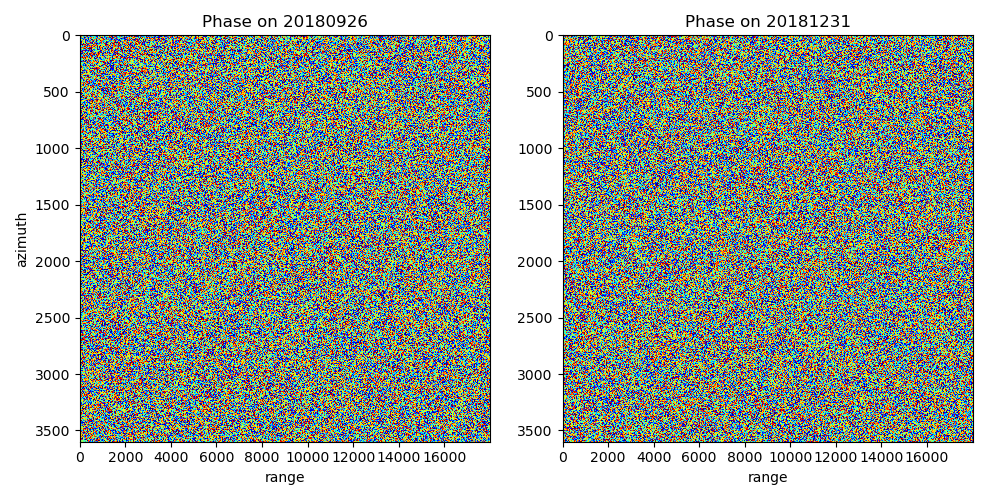

In [8]:
plt.figure(figsize=(10, 5),tight_layout=True)

plt.subplot(1,2,1)
plt.imshow(np.angle(slc1),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.ylabel('azimuth')
plt.xlabel('range')
plt.title("Phase on "+str(date1))

plt.subplot(1,2,2)
plt.imshow(np.angle(slc2),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.xlabel('range')
plt.title("Phase on "+str(date2))

plt.show()

#plt.savefig("SLC_Phases.png", transparent=True)

Plot the interferogram that is made with the SLC phases above. 

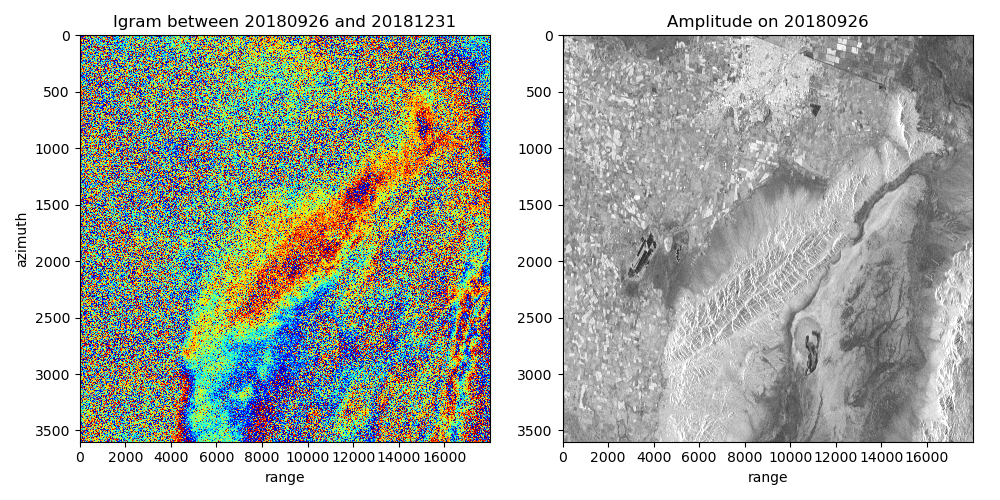

In [11]:
plt.figure(figsize=(10, 5),tight_layout=True)

plt.subplot(1,2,1)
plt.imshow(np.angle(int12),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.ylabel('azimuth')
plt.xlabel('range')
plt.title("Igram between "+str(date1)+" and "+str(date2))

plt.subplot(1,2,2)
# without the vmin, vmax it shows up as all black. 
# But it should be automatically calculating the range. Why? 
###NOTE FROM RO - there are a FEW very bright points, so the max is high.
plt.imshow(np.log10(np.abs(slc1)), vmin=1, vmax=2.2, cmap='gray', aspect='auto')
plt.xlabel('range')
plt.title("Amplitude on "+str(date1))

plt.show()

#plt.savefig("Full_res_igram.png")